# EAD para Séries Temporais

In [77]:
library(forecast)
library(data.table)
library(tseries)
library(urca)

In [78]:
head(EuStockMarkets)

,DAX,SMI,CAC,FTSE
1991.496,1628.75,1678.1,1772.8,2443.6
1991.500,1613.63,1688.5,1750.5,2460.2
1991.504,1606.51,1678.6,1718.0,2448.2
1991.508,1621.04,1684.1,1708.1,2470.4
1991.512,1618.16,1686.6,1723.1,2484.7
1991.515,1610.61,1671.6,1714.3,2466.8


> Esse conj informa preço dos fechamentos diarios dos quatros principais indices europeus de ações de bolsa 1991 a 1998, com apenas dias uteis

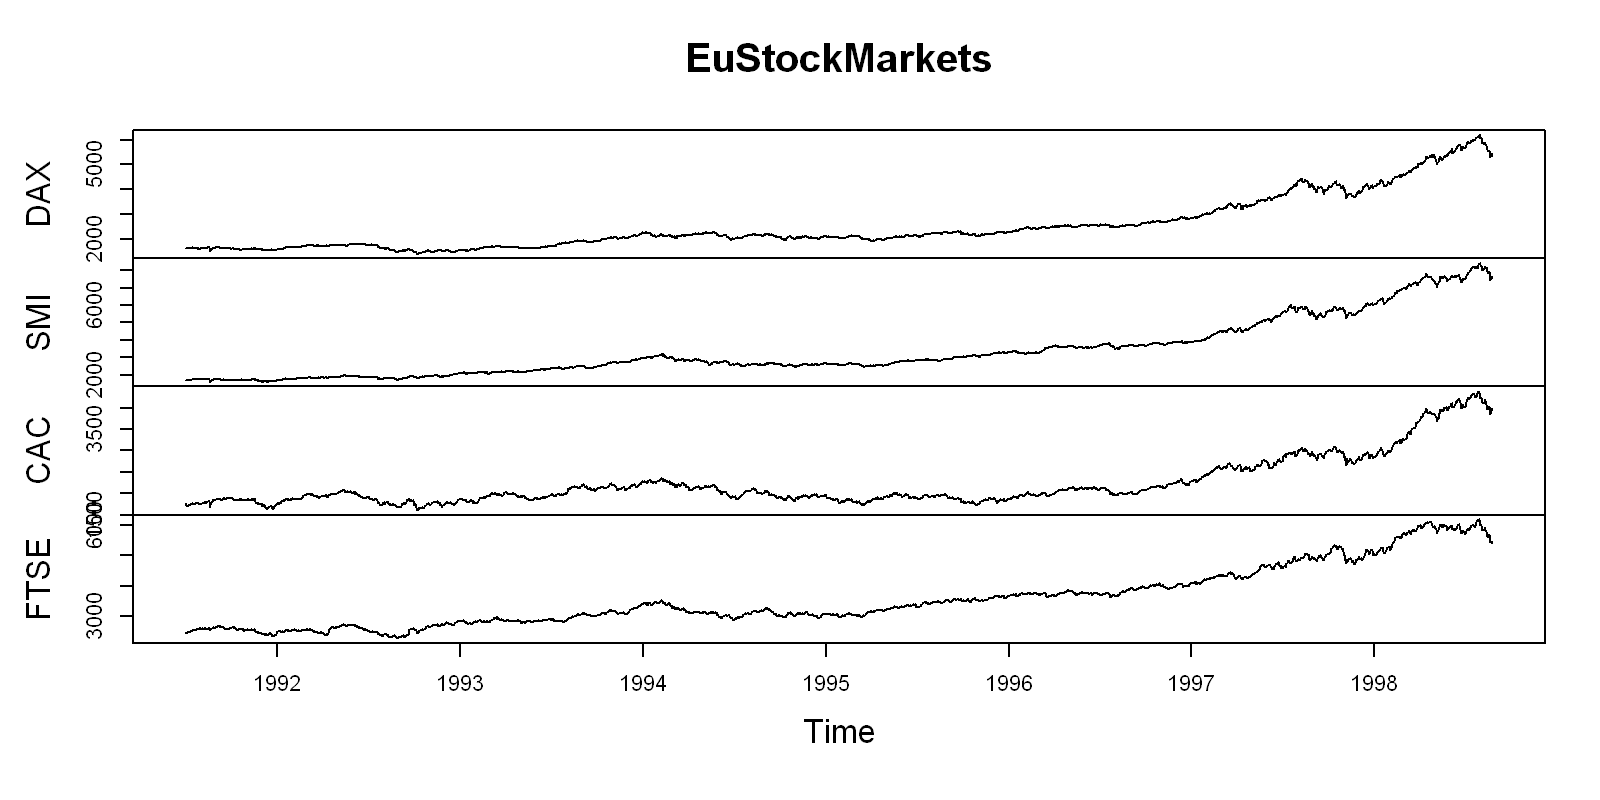

In [79]:
par(bg = 'white')
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 200)
plot(EuStockMarkets, type = 'l')

A imagem foi segmentada automanticamente isso ocorre pois pois os dados estão no formato mts para series, agora vermos algumaas funções delas :

1. `frequency` : descobri a frequencia anual dos dados

In [80]:
frequency(EuStockMarkets)

[1] 260

2. `start` e `end` : para encontrar o primeiro e ultimo tempo da series

In [81]:
c(inicio =c(start(EuStockMarkets)), final=c(end(EuStockMarkets)))

inicio1 inicio2  final1  final2 
   1991     130    1998     169

3. `window` : para obter uma seção temporal dos dados

In [82]:
head(window(EuStockMarkets, start =1997, end = 1998))

,DAX,SMI,CAC,FTSE
1997.000,2844.09,3869.8,2289.6,4092.5
1997.004,2844.09,3869.8,2289.6,4092.5
1997.008,2844.09,3869.8,2303.8,4092.5
1997.012,2859.22,3922.2,2307.0,4091.0
1997.015,2880.07,3948.3,2318.6,4115.7
1997.019,2880.07,3942.2,2315.7,4118.5


## Histogramas



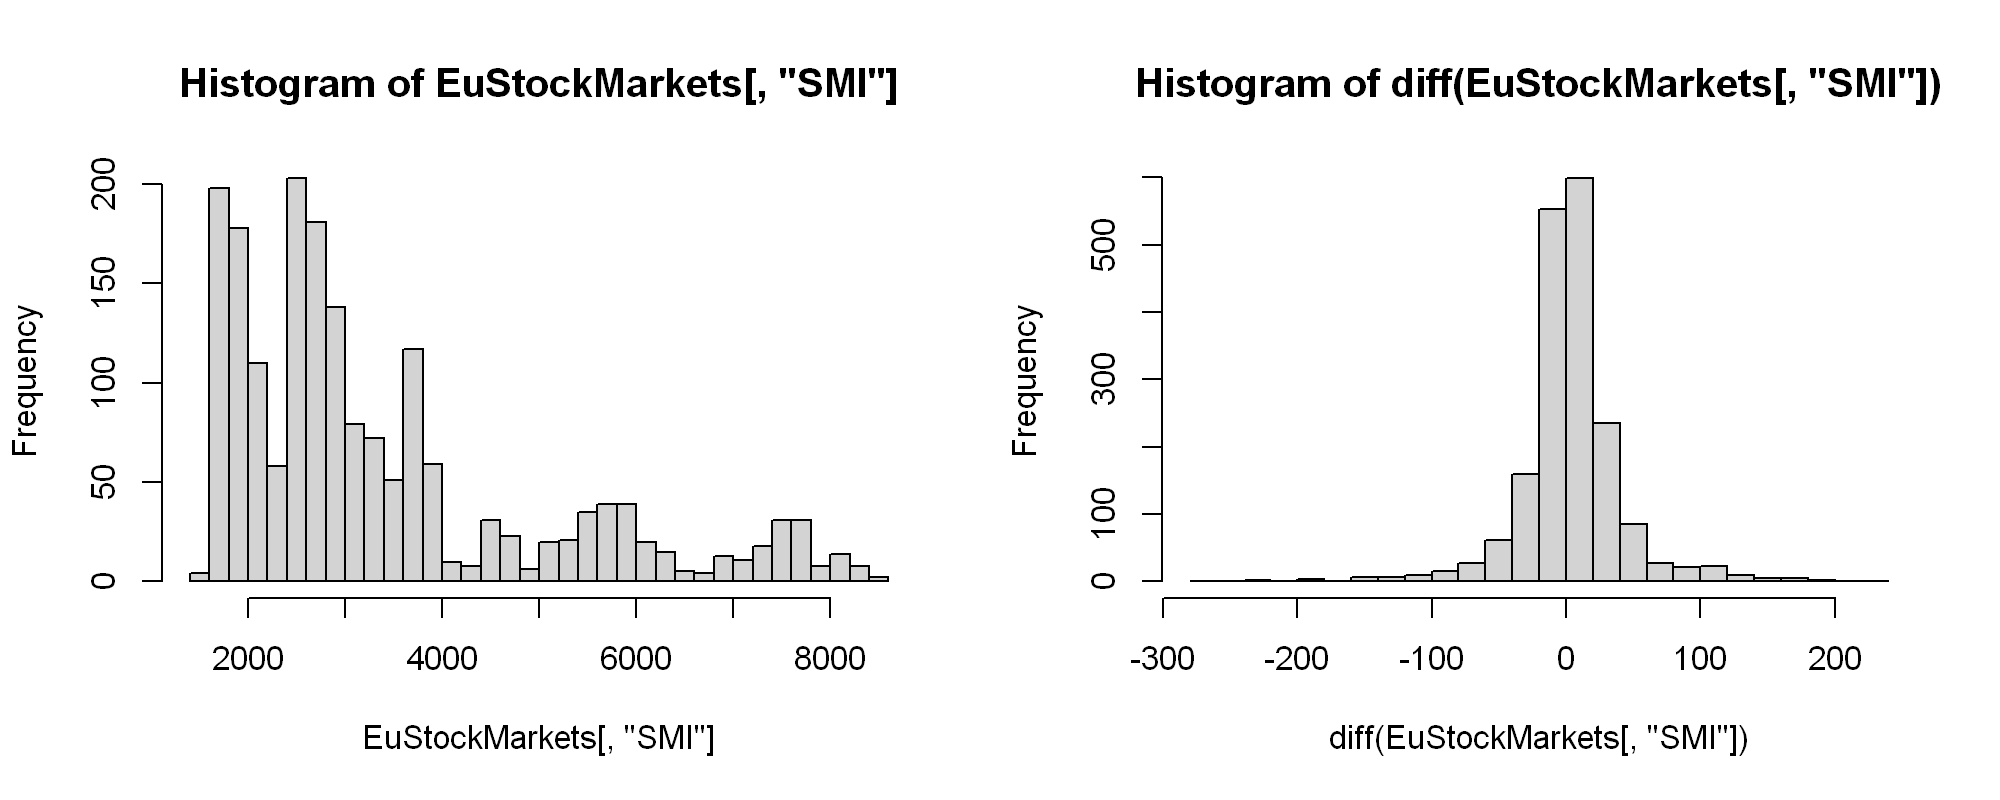

In [83]:
par(bg = 'white', mfrow = c(1, 2))
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 200)
hist(EuStockMarkets[,'SMI'], 30)
hist(diff(EuStockMarkets[, 'SMI']), 30)

> Um **historagrama da diferença dos dados é mais interessante do que os dados normais**, principalmente para area das `FINANÇAS`

## Grafico de dispersão

Grafico de dispersão é tao vantajoso para dados de séries temporais quanto para outros tipo de dados. **Podemos usar o grafico de dispersão para determinar como duas ações estão vinculadas em um tempo espeficico e como as suas mudanças de preço estão relacionadas ao longo do tempo**

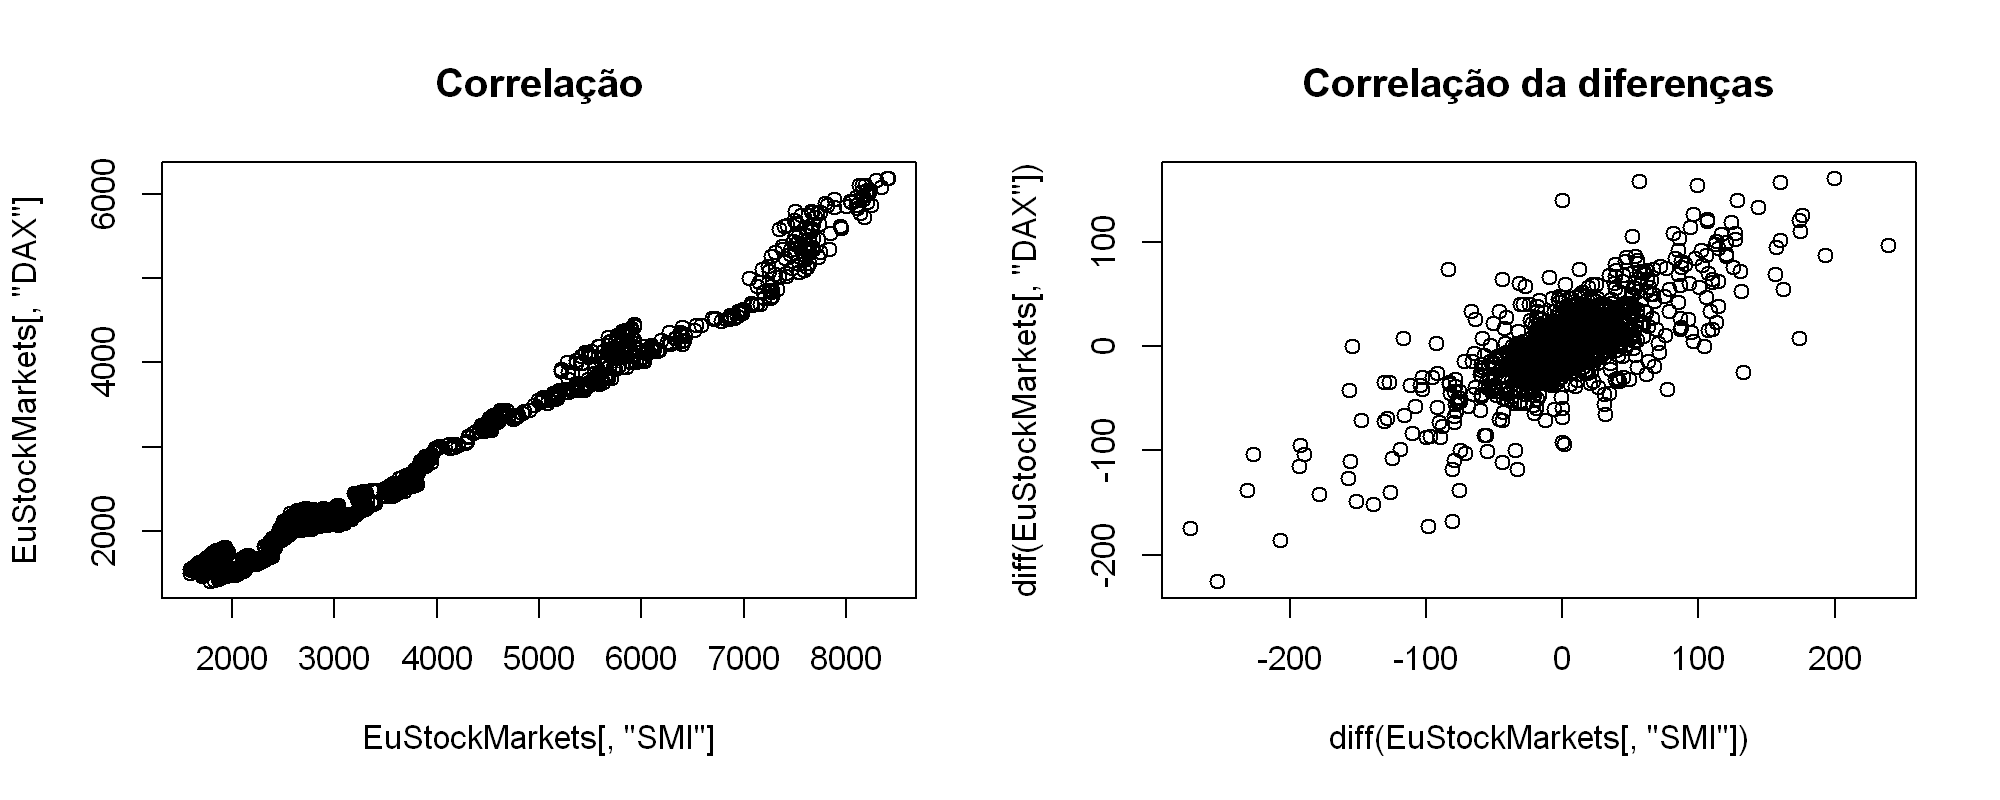

In [84]:
par(bg = 'white', mfrow = c(1, 2))
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 200)
plot(EuStockMarkets[, 'SMI'], EuStockMarkets[, 'DAX'], main='Correlação')
plot(diff(EuStockMarkets[, 'SMI']), diff(EuStockMarkets[, 'DAX']), main='Correlação da diferenças')

> Os valores reais são menos informativos que a **diferenças entre os pontos de tempos subjacentes**

A primeira vista vemos que há uma forte correlação,mas nem tudo é o que parece

#### Correlação espúria

* Economistas aprenderam que os dados com tendecia subjacente provavelmente gerarão correlações espurias.
    * Há mais series temporais com tendencias do que series temporais estacionarias
* Algumas caracteristicas que podem introduzir correlações espúrias :
    1. Sazonalidade - 

### voltando...

No grafico acima por mais que as correlações possam ser verdadeiras, elas não são correlações que podemos monetizara como trades atuantes. 

Quando uma ação está em queda ou em alta, outras ações com as quais está correlacionda também estarão,**visto que estamos fazendo correlação de valores em ponto de tempos identicos**. 

O que predizamos fazer é descobrir se a **mudança de tempo anterior de uma ação pode predizar a mudança posterior no tempo de outra ação**

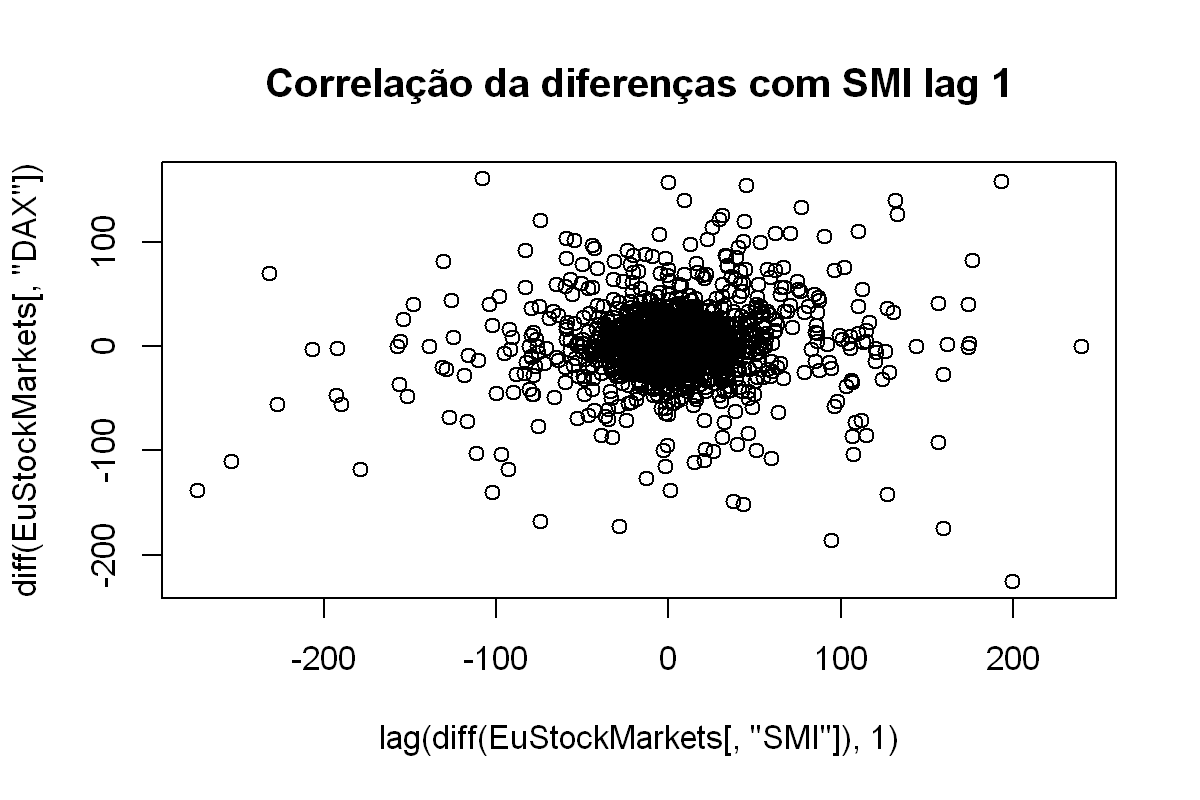

In [85]:
par(bg = 'white')
options(repr.plot.width =6, repr.plot.height = 4, repr.plot.res = 200)
plot(lag(diff(EuStockMarkets[, 'SMI']), 1), diff(EuStockMarkets[, 'DAX']), main='Correlação da diferenças com SMI lag 1')

> Você está vendo se as variações passadas do SMI (no dia anterior) têm alguma relação com as variações atuais do DAX.

In [86]:
a = c(1, 2, 3, 4)
shift(a, 1)
shift(a, -1)

[1] NA  1  2  3

[1]  2  3  4 NA

## Métodos exeplorátórios Específicos de Series Temporais

* Estacinariedade
* Self-correlation
* Correlações espúrias

### Estacioneriadade

**Muitos modelos estaticos de tradicionais de series temporais dependem de uma serie temporal estacionaria**. 
> Grosso modo, uma série temporal estacionaria é aquela que tem propriedade estatisticas razoalmente estáveis ao longo tempo, sobretudo no que diz respeito a média e variancia.

>  No contexto deste livro, um processo estocastico e estacionario se sua media e variancia
 sao constantes no tempo e sua autocovariancia depende apenas da ordem de defasagem 

> Um processo e nao estacionario se apresenta tendencia

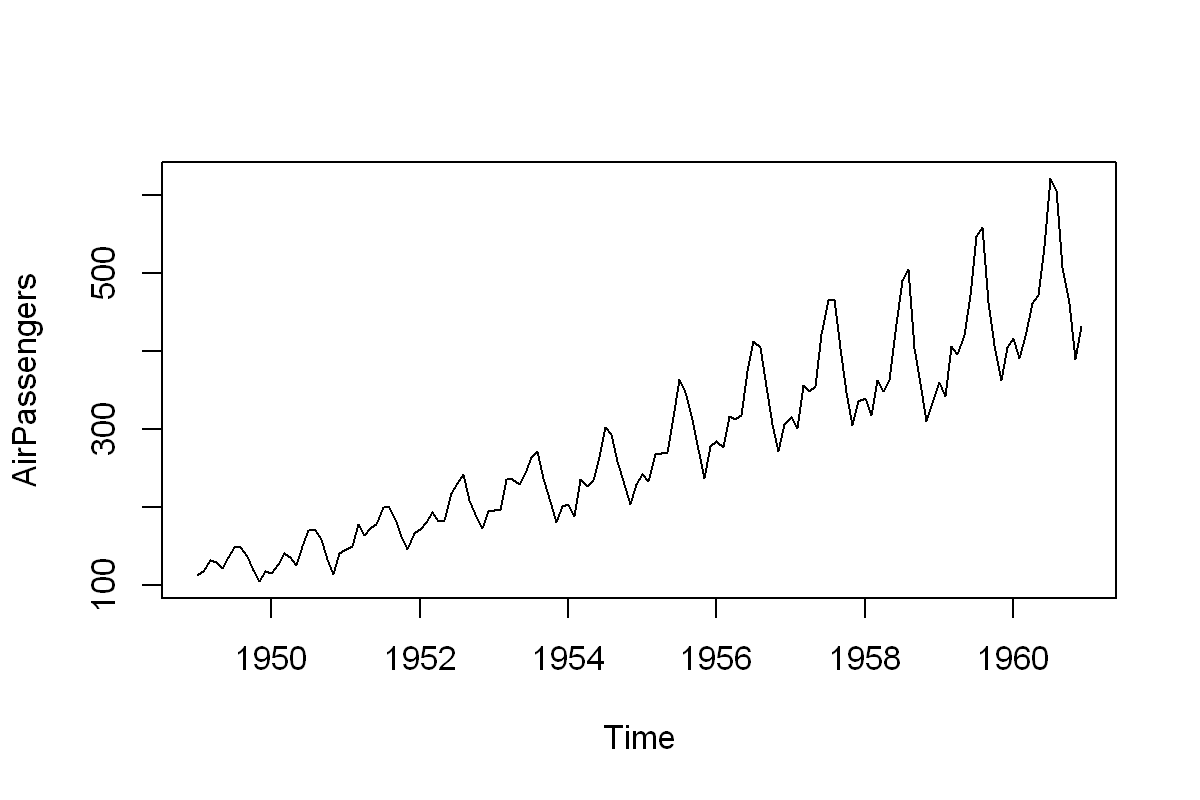

In [87]:
par(bg = 'white')
plot(AirPassengers)

> Média e variancia estão mudando ao longo do tempo, Vemos também evidencias de sazonalidade refletindo intrisecamente um processo não estacionario

Um processo não estacionario apresenta uma lento decaimento de sua função de autocorrelação

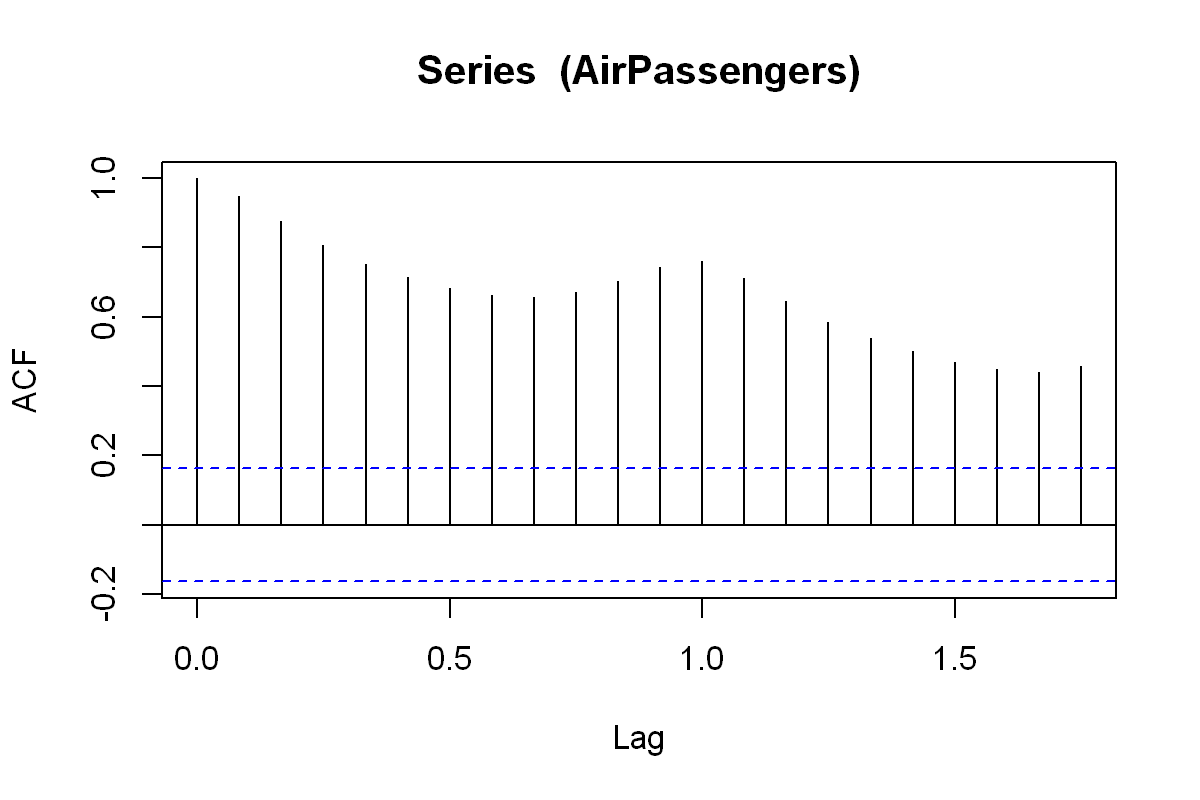

In [88]:
par(bg = 'white')
acf((AirPassengers))

### Tipos de não estacionariedade

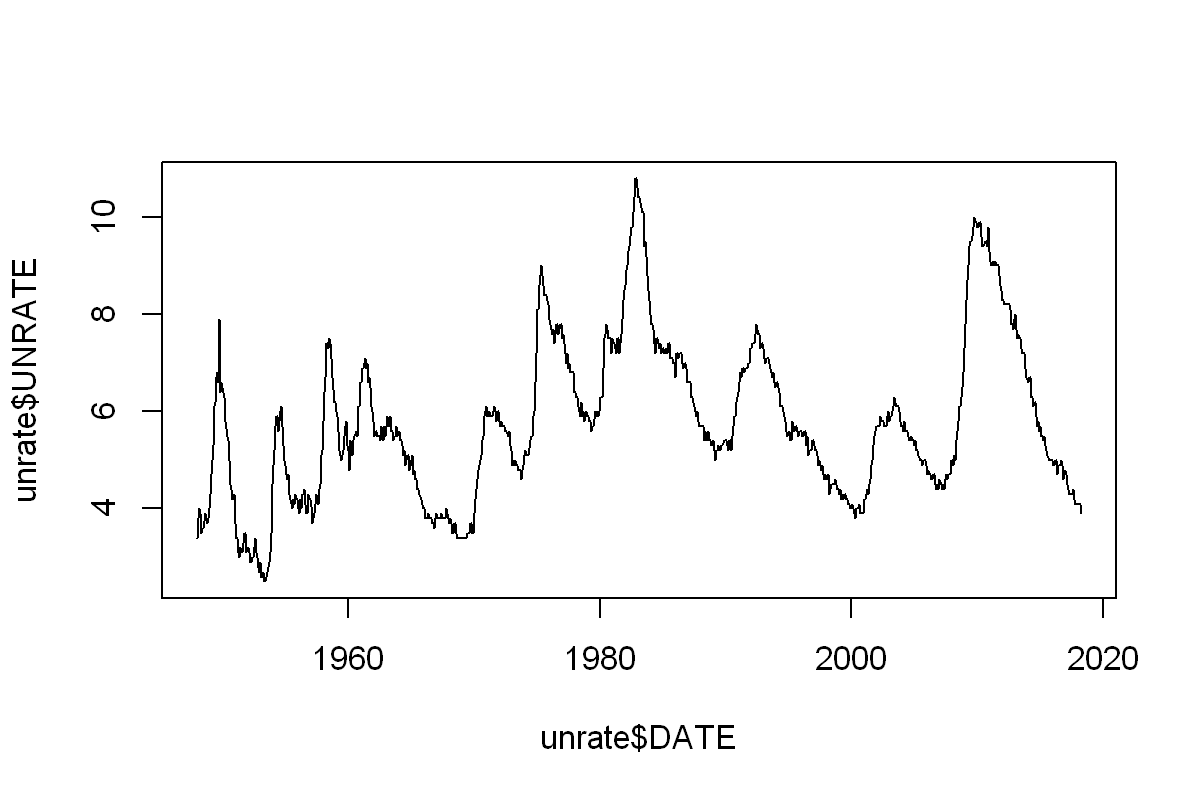

In [89]:
unrate = fread('dataset/UNRATE.csv')
par(bg = 'white')
plot(unrate$DATE, unrate$UNRATE, type = 'l')

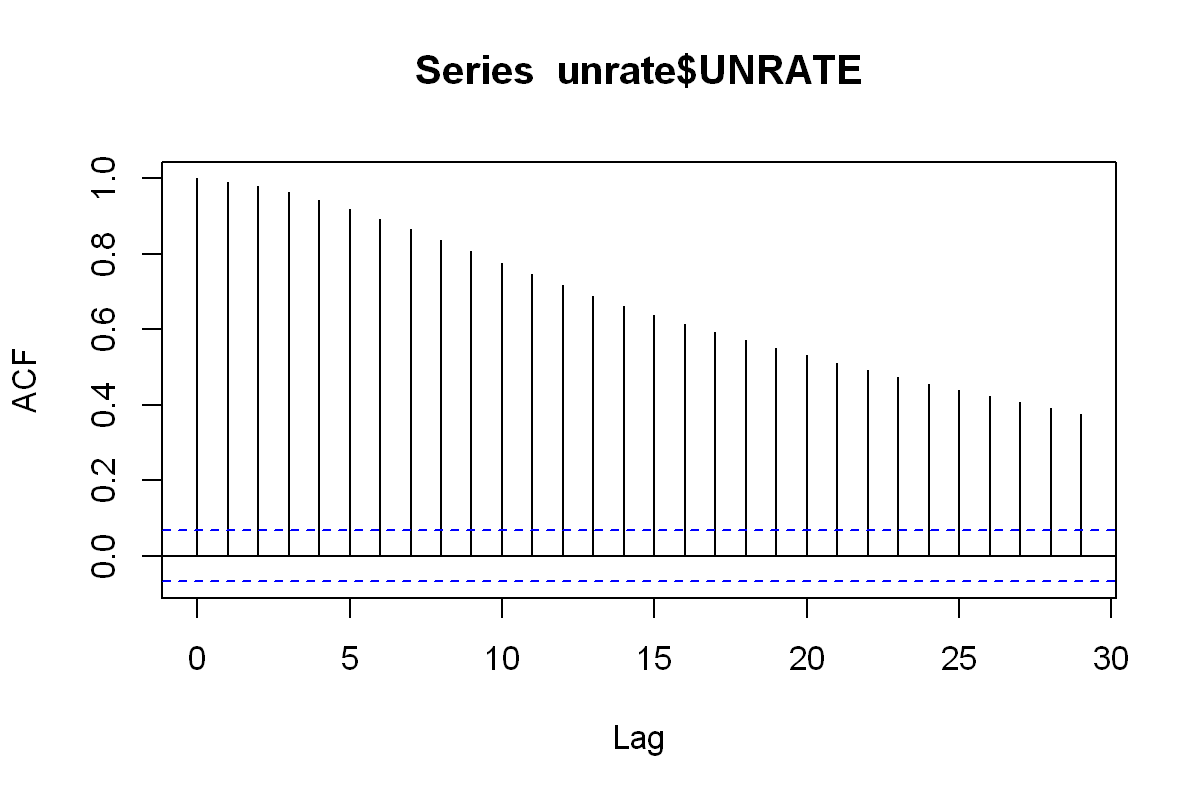

In [90]:
par(bg = 'white')
acf(unrate$UNRATE)

#### Testes estacionarios

##### Teste Dickey-Fuller Aumentado

* Hipótese nula (H₀): a série tem raiz unitária → não é estacionária (possui tendência estocástica).

* Hipótese alternativa (H₁): a série não tem raiz unitária → é estacionária.

In [91]:
adf.test(unrate$UNRATE,k = 10)


	Augmented Dickey-Fuller Test

data:  unrate$UNRATE
Dickey-Fuller = -3.3995, Lag order = 10, p-value = 0.05353
alternative hypothesis: stationary


> Se p-valor > 0.05(nivel de significancia)  : aceito $H_0$
>
> Se p-valor <= 0.05 **rejeito H_0 e aceito a hipotese alternative H_1**

#### KPSS

* Hipótese nula (H₀): é estacionaria.

* Hipótese alternativa (H₁): a série não tem raiz unitária → não é estacionária.

In [92]:
kpss.test(unrate$UNRATE)

Warning message in kpss.test(unrate$UNRATE):
"p-value smaller than printed p-value"



	KPSS Test for Level Stationarity

data:  unrate$UNRATE
KPSS Level = 1.6067, Truncation lag parameter = 6, p-value = 0.01


p-valor <= 0.05 não é estacionaria

#### Phillips-Perron
O teste de Phillips-Perron e mais indicado quando a amostra e muito grande ou se pode assumir que suas caractersticas estruturais nao se alteram ao longo de tempo

In [93]:
pp.test(unrate$UNRATE)


	Phillips-Perron Unit Root Test

data:  unrate$UNRATE
Dickey-Fuller Z(alpha) = -15.523, Truncation lag parameter = 6, p-value
= 0.2438
alternative hypothesis: stationary


p-valor >= 0.05 não é estacionaria

####  Dickey Fuller-GLS 
Tem uma poder estatistico maior que o ADFULLER

In [94]:
summary(ur.ers(unrate$UNRATE, type = 'DF-GLS'))


############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.51859 -0.09291  0.01220  0.12124  1.19638 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
yd.lag       -0.005199   0.002430  -2.140   0.0327 *  
yd.diff.lag1  0.021600   0.034291   0.630   0.5289    
yd.diff.lag2  0.243242   0.033766   7.204 1.31e-12 ***
yd.diff.lag3  0.181628   0.033812   5.372 1.01e-07 ***
yd.diff.lag4  0.087378   0.034258   2.551   0.0109 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.195 on 834 degrees of freedom
Multiple R-squared:  0.1322,	Adjusted R-squared:  0.127 
F-statistic: 25.41 on 5 and 834 DF,  p-value: < 2.2e-16


Value of test-statistic is: -2.1399 

Critical value

### Transformações
É possivel transforma a serie estacionario com algumas transformações

In [112]:
lambda_otimo = BoxCox.lambda(unrate$UNRATE)
lambda_otimo

[1] 0.6393777

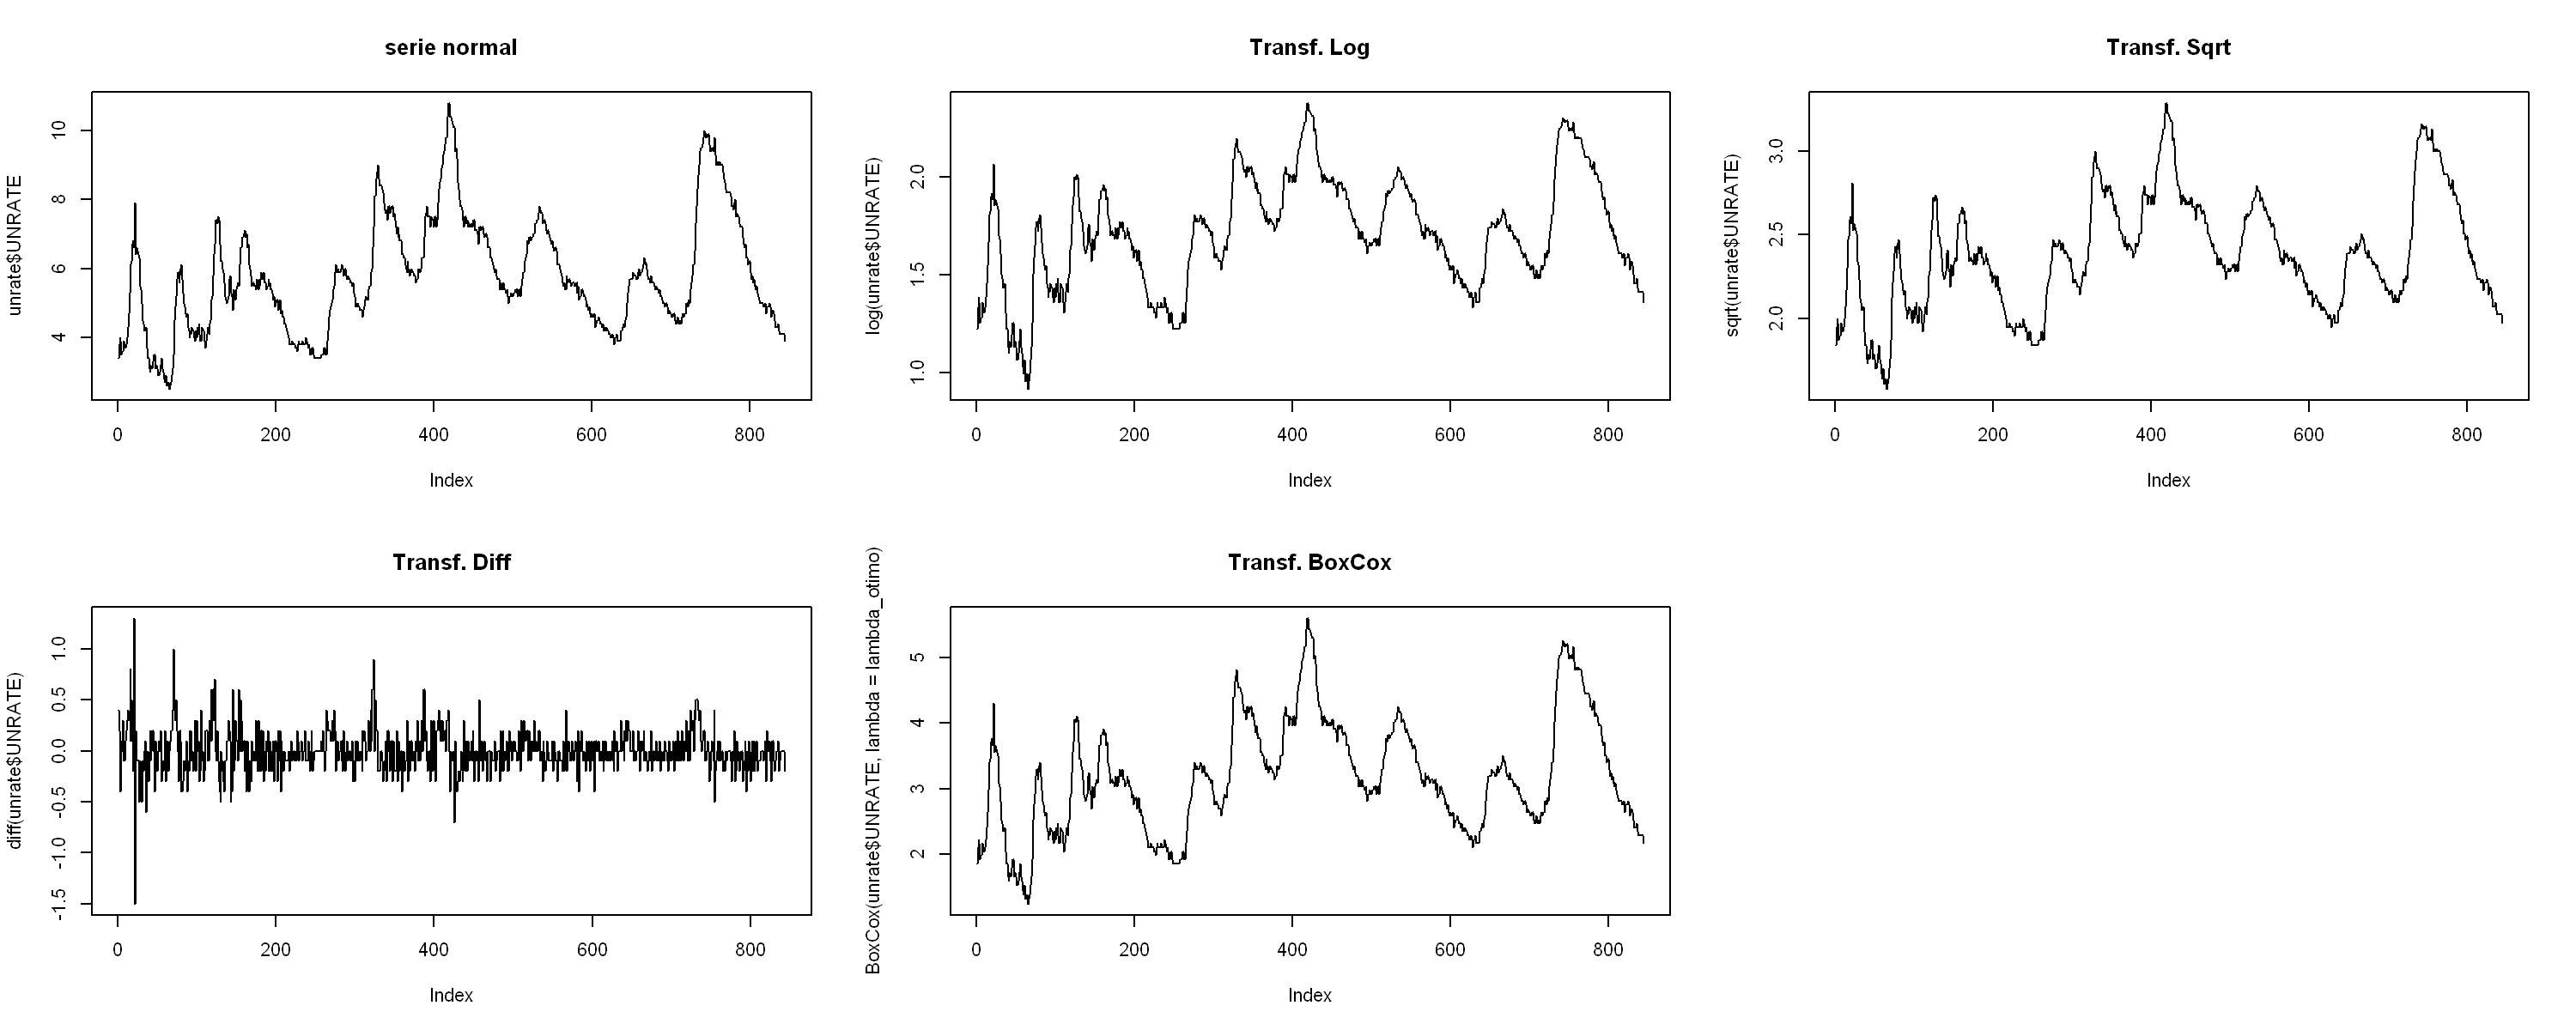

In [123]:
par(bg = 'white', mfrow = c(2,3))
options(repr.plot.width = 15, repr.plot.height = 6, repr.plot.res = 200)
plot(unrate$UNRATE, type='l', main='serie normal')
plot(log(unrate$UNRATE), type='l', main='Transf. Log')
plot(sqrt(unrate$UNRATE), type='l', main='Transf. Sqrt')
plot(diff(unrate$UNRATE), type='l', main='Transf. Diff')
plot(BoxCox(unrate$UNRATE,lambda = lambda_otimo), type='l', main='Transf. BoxCox')

### Usando Janelas

## Outras visualizações

### Visualição 1D

In [128]:
library(timevis)

In [124]:
donations = fread('dataset/donations.csv')
head(donations)

amount,timestamp,user
<dbl>,<dttm>,<dbl>
25,2017-11-12 11:13:44,0
50,2015-08-25 19:01:45,0
25,2015-03-26 12:03:47,0
50,2016-07-06 12:24:55,0
50,2016-05-11 18:13:04,1
75,2017-01-23 12:55:47,1


In [148]:
donations[, timestamp:=as.Date(timestamp)]

In [149]:
d =  donations[, .(min(timestamp), max(timestamp)), by=user]
head(d)

user,V1,V2
<dbl>,<date>,<date>
0,2015-03-26,2017-11-12
1,2016-05-05,2017-01-23
2,2016-03-15,2017-07-25
5,2017-07-28,2017-09-20
6,2017-07-06,2017-11-01
8,2017-11-11,2017-12-23


In [150]:
names(d) = c('content', 'start', 'end')
head(d)

content,start,end
<dbl>,<date>,<date>
0,2015-03-26,2017-11-12
1,2016-05-05,2017-01-23
2,2016-03-15,2017-07-25
5,2017-07-28,2017-09-20
6,2017-07-06,2017-11-01
8,2017-11-11,2017-12-23


In [141]:
d = d[start!=end]